In [13]:
import config
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def get_news(country):
    url = "https://newsdata2.p.rapidapi.com/news"

    headers = {
	    "X-RapidAPI-Key": config.news_api_key,
	    "X-RapidAPI-Host": "newsdata2.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=dict(country=country))
    return response.json()

In [15]:
def create_df(data):
    df = pd.DataFrame(data["results"])
    df["content"] = df["content"].replace("’", "", regex=True)
    return df

In [16]:
def wordcloud_plot(df, stop_words, country):
    # Concatenate the text from the column 'content'
    contents = " ".join(df["content"])

    # Create the word cloud image
    word_cloud = WordCloud(background_color='white',
                       stopwords=stop_words,
                       width=800,
                       height=400)

    # Generate the word cloud using the review data
    word_cloud.generate(contents)

    # Display the word cloud
    title = f"News from {country.upper()}"
    plt.rcParams["figure.figsize"] = (12, 8)
    plt.imshow(word_cloud, interpolation="bilinear") 
    plt.axis("off")
    plt.title(title)
    plt.savefig(f"{country}.png", dpi=150)
    plt.show()

In [19]:
def post_telegram(country):
    TOKEN = config.TG_TOKEN
    chat_id = config.chat_id
    url = f"https://api.telegram.org/bot{TOKEN}/sendPhoto?chat_id={chat_id}"
    files = {"photo": open(f"{country}.png", "rb")}
    requests.post(url, files=files)

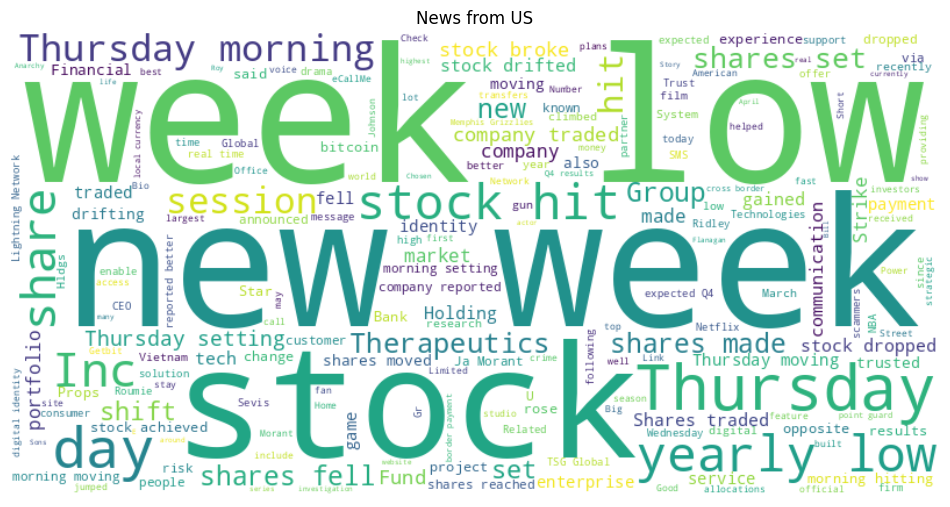

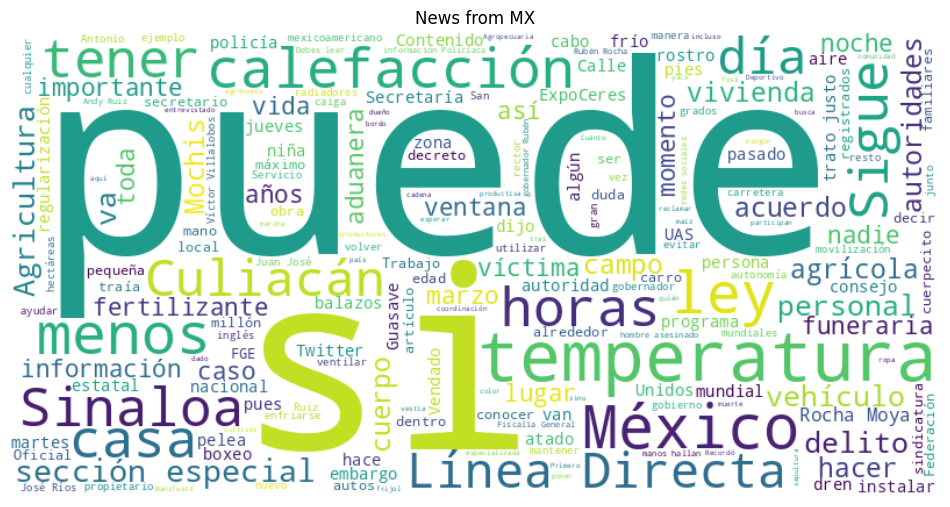

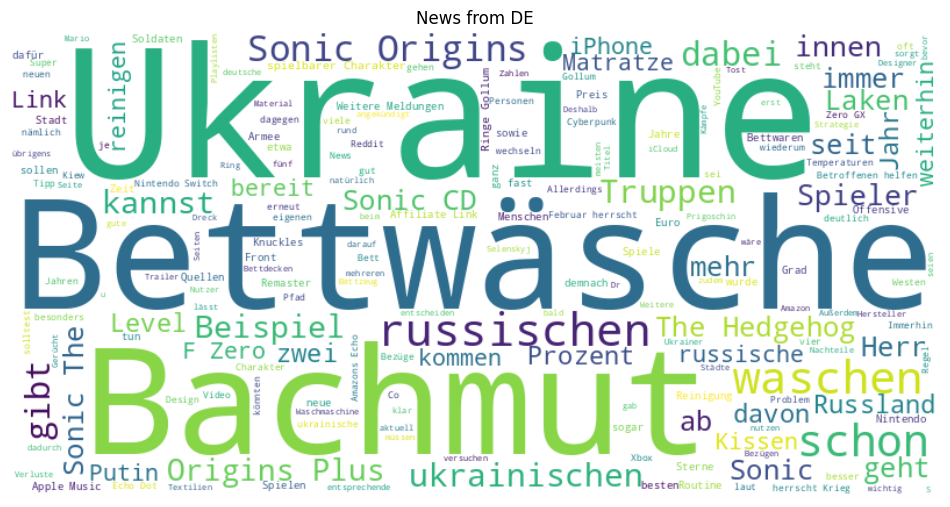

In [20]:
countries = {"us": "english", "mx": "spanish", "de": "german"}

for k, v in countries.items():
    json_data = get_news(k)
    df = create_df(json_data)
    stop_words = set(stopwords.words(v))
    wordcloud_plot(df, stop_words, k)
    post_telegram(k)

Things to do next:
* compare with another API
* prepare to submit to Github
* send plots to WA or TG writing a bot